# ISRAEL-PALESTINE CONFLICT ANALYSIS (2000 - 2021)

**I will be analyzing one of the longest running conflicts in the world here, the war between Israel and Palestine and then finish up by building a detailed Dashboard using Matplotlib.**

In [251]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings;warnings.filterwarnings('ignore')

In [233]:
# custom colors
my_colors = ["#c6b34e","#95354a", "#57b9a8","#b0ddff", "#426872","#215c97", "#02b6b4","#b05468","#cd9f62","#aaaaaa","#8fce00","#827861"]
# Create a seaborn palette object
my_palette = sns.color_palette(my_colors)
# Use the custom palette with a seaborn function
sns.set_palette(my_palette)
from matplotlib.colors import ListedColormap
colors = ['#ffffcd', '#ffeaa4', '#ffca2a','#c6b34e']
my_cmap = sns.color_palette(colors)
cmap = ListedColormap(colors)

In [234]:
# read dataset
df = pd.read_csv('Palestine Body Count.csv');df

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000.0,DECEMBER,781,NaN,51,8
1,2000.0,NOVEMBER,3838,NaN,112,22
2,2000.0,OCTOBER,5984,NaN,104,10
3,2000.0,SEPTEMBER,NaN,NaN,16,1
4,2001.0,DECEMBER,304,NaN,67,36
...,...,...,...,...,...,...
246,2021.0,MARCH,NaN,NaN,4,0
247,2021.0,APRIL,NaN,NaN,1,0
248,2021.0,MAY,NaN,NaN,26,3
249,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    float64
 1   Month                  249 non-null    object 
 2   Palestinians Injuries  196 non-null    object 
 3   Israelis Injuries      133 non-null    object 
 4   Palestinians Killed    250 non-null    object 
 5   Israelis Killed        250 non-null    object 
dtypes: float64(1), object(5)
memory usage: 11.9+ KB


In [236]:
df.isnull().sum()

Year                       2
Month                      2
Palestinians Injuries     55
Israelis Injuries        118
Palestinians Killed        1
Israelis Killed            1
dtype: int64

In [237]:
df.duplicated().sum()

0

In [238]:
# impute missing injuries with 0
df = df.fillna({
    'Palestinians Injuries': '0',
    'Israelis Injuries': '0'
})

In [239]:
# convert to numerical data type
num_cols = ['Year', 'Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [242]:
df.dtypes

Year                     float64
Month                     object
Palestinians Injuries    float64
Israelis Injuries        float64
Palestinians Killed      float64
Israelis Killed          float64
dtype: object

In [243]:
# drop null values
df.dropna(inplace=True)

In [244]:
# convert numerical columns from float to integer data type
df[['Year', 'Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']] = df[['Year', 'Palestinians Injuries', 
                                                                                                              'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']].astype('int')

In [248]:
# handle incosistencies in 'Month' column
df['Month'] = df['Month'].replace({'MAY': 'MAY'})
df['Month'] = df['Month'].str.title()

In [249]:
# show random samples
df.sample(10)

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
131,2011,May,397,36,2,0
168,2014,April,302,15,0,1
33,2003,July,34,0,4,2
187,2016,September,210,14,11,0
83,2007,May,281,30,62,2
114,2010,October,147,5,6,0
13,2001,March,927,0,27,8
141,2012,July,202,12,3,0
149,2013,November,320,5,9,1
14,2001,February,598,0,19,13


In [250]:
# descriptive stats
df.describe()

,Year,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
count,247.000000,247.000000,247.000000,247.000000,247.000000
mean,2010.502024,451.315789,20.890688,34.024291,4.923077
std,6.020881,1471.798713,150.387900,83.715251,11.178438
min,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,61.500000,0.000000,4.000000,0.000000
50%,2010.000000,161.000000,3.000000,12.000000,1.000000
75%,2016.000000,302.500000,15.000000,36.500000,5.000000
max,2021.000000,13735.000000,2347.000000,978.000000,122.000000


## EDA

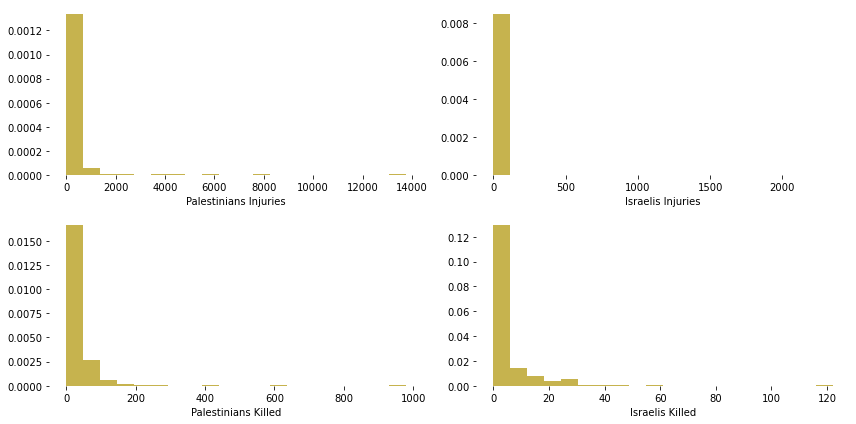

In [252]:
# Plotting the distribution of injuries and killings
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(df['Palestinians Injuries'], bins=20, density=True)
plt.xlabel('Palestinians Injuries')

plt.subplot(2, 2, 2)
plt.hist(df['Israelis Injuries'], bins=20, density=True)
plt.xlabel('Israelis Injuries')

plt.subplot(2, 2, 3)
plt.hist(df['Palestinians Killed'], bins=20, density=True)
plt.xlabel('Palestinians Killed')

plt.subplot(2, 2, 4)
plt.hist(df['Israelis Killed'], bins=20, density=True)
plt.xlabel('Israelis Killed')

plt.tight_layout()
plt.show()

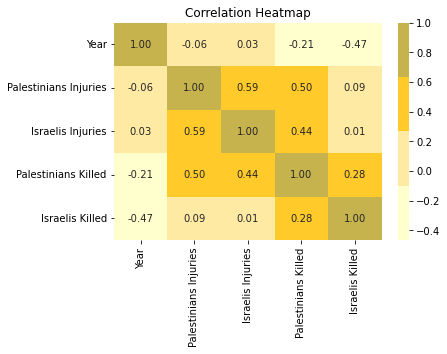

In [256]:
# Calculate the correlation matrix
correlation_matrix = df[num_cols].corr()

# Plotting a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=cmap)
plt.title('Correlation Heatmap')
plt.show()

In [258]:
# group injuries & killings by month
monthly_injuries  = df.groupby('Month')[['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']].sum()
monthly_injuries

,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
Month,,,,
April,4673,226,605,84
August,16622,2496,990,103
December,23836,227,945,86
February,4508,238,435,76
January,8705,199,1362,91
July,4860,219,399,61
June,3906,169,390,137
March,5548,251,719,193
May,5228,203,526,89


In [259]:
# Group by 'Year' and sum the injuries and killings for each year
yearly_injuries = df.groupby('Year')[['Palestinians Injuries', 'Israelis Injuries']].sum()
yearly_killings = df.groupby('Year')[['Palestinians Killed', 'Israelis Killed']].sum()

# Reset index to get 'Year' as a column
yearly_injuries.reset_index(inplace=True)
yearly_killings.reset_index(inplace=True)

## Building of Dashboard

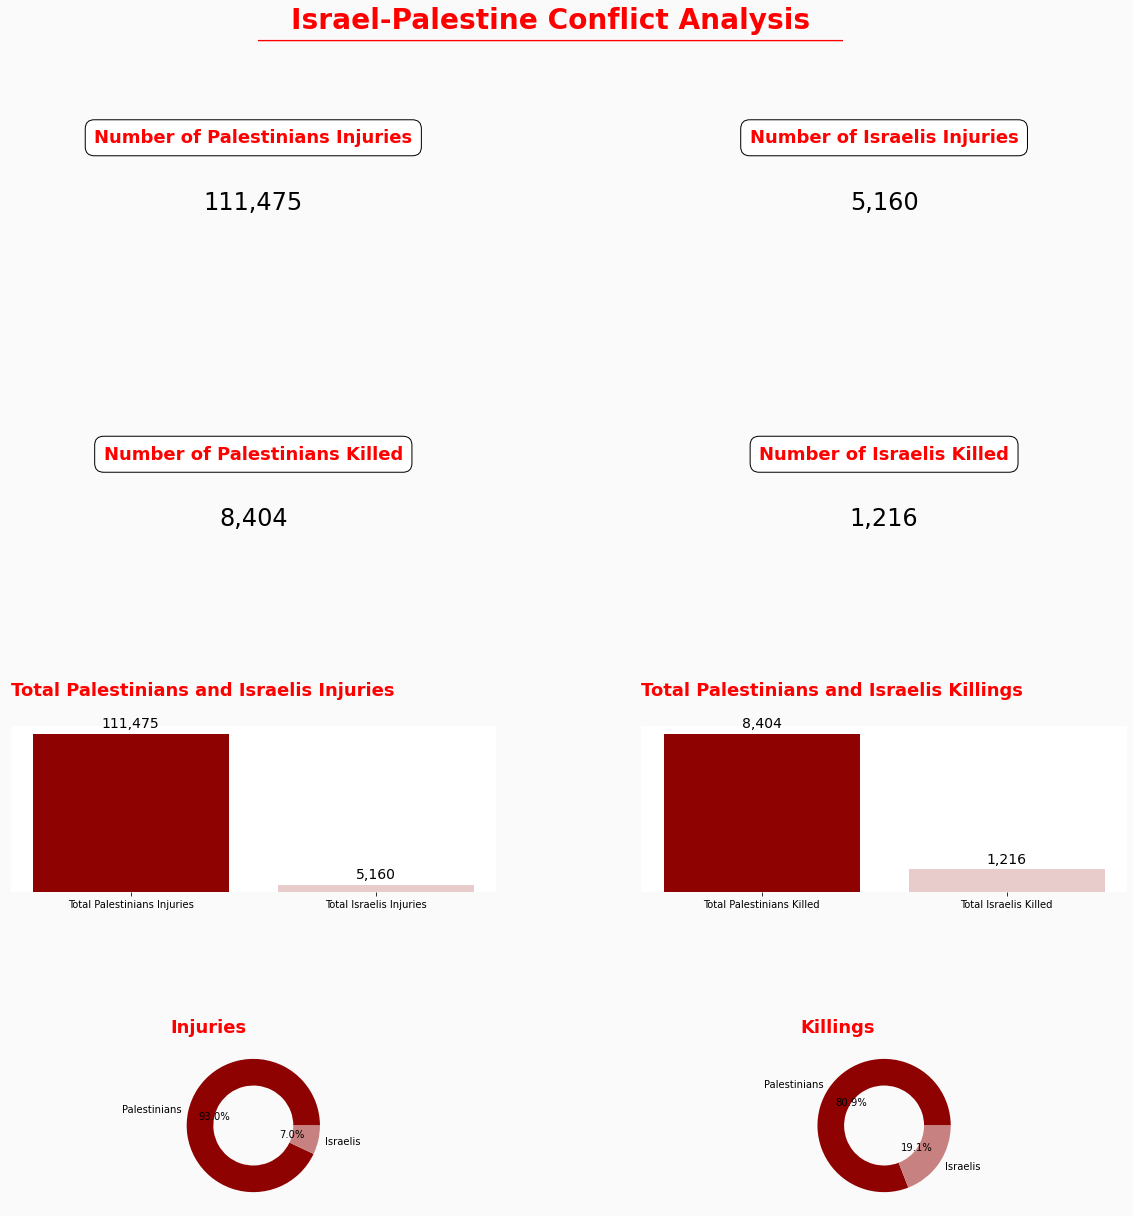

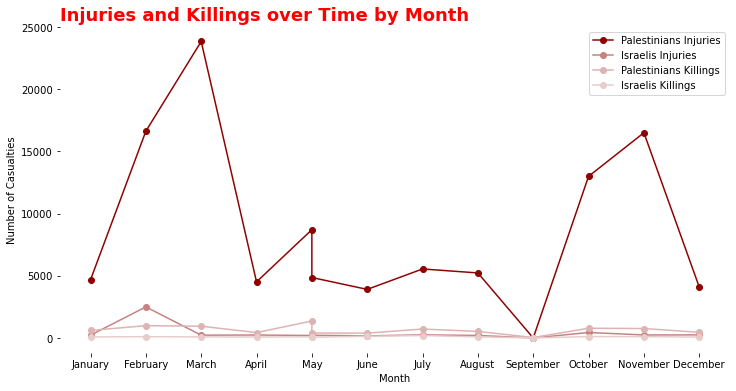

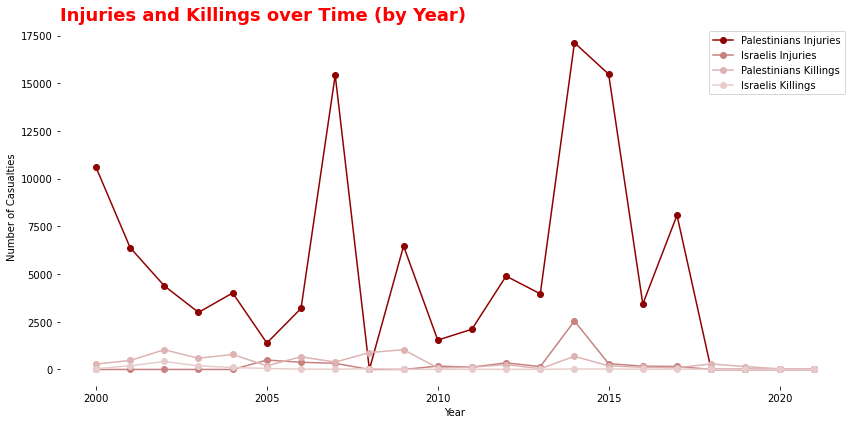

In [263]:
# making labels and counts for injuries and killings
labels = ['Total Palestinians Injuries', 'Total Israelis Injuries', 'Total Palestinians Killed', 'Total Israelis Killed']
counts = [111475, 5160, 8404, 1216] 

# figure and subplots for the Dashboard
fig, axs = plt.subplots(4, 2, figsize=(20, 20), facecolor='#fafafa', gridspec_kw={'hspace': 0.9})

# Dashboard TItle with underline
fig.text(0.5, 0.95, 'Israel-Palestine Conflict Analysis', fontsize=28, weight='bold', color='red', ha='center', va='center', wrap=True, usetex=False)
fig.text(0.5, 0.94, '_____________________________________________________________________________________________________________________', 
         color='red', ha='center', va='center', wrap=True, usetex=False, weight='bold')
plt.subplots_adjust(top=0.9)

# Spacing between subplots
fig.tight_layout(rect=[0, 0.3, 5, 0.95])

# Setting dashboard edge color. I don't want any, so I used 'none'
plt.rcParams['axes.edgecolor'] = 'none'

# Cards
    # Number of Palestinians Injuries
casualties_card = axs[0, 0].text(0.5, 0.7, 'Number of Palestinians Injuries', fontsize=18, ha='center', color='red', weight='bold', 
                                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
axs[0, 0].text(0.5, 0.3, f'{counts[0]:,}', fontsize=24, ha='center')
axs[0, 0].axis('off')

    # Number of Israelis Injuries
casualties_card = axs[0, 1].text(0.5, 0.7, 'Number of Israelis Injuries', fontsize=18, ha='center', color='red', weight='bold', 
                                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
axs[0, 1].text(0.5, 0.3, f'{counts[1]:,}', fontsize=24, ha='center')
axs[0, 1].axis('off')

    # Number of Palestinians Killed
casualties_card = axs[1, 0].text(0.5, 0.7, 'Number of Palestinians Killed', fontsize=18, ha='center', color='red', weight='bold', 
                                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
axs[1, 0].text(0.5, 0.3, f'{counts[2]:,}', fontsize=24, ha='center')
axs[1, 0].axis('off')

    # Number of Israelis Killed
casualties_card = axs[1, 1].text(0.5, 0.7, 'Number of Israelis Killed', fontsize=18, ha='center', color='red', weight='bold', 
                                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
axs[1, 1].text(0.5, 0.3, f'{counts[3]:,}', fontsize=24, ha='center')
axs[1, 1].axis('off')

# Spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Plot 1: Total Palestinians and Israelis Injuries (Bar Plot)
plt1 = axs[2, 0].bar(labels[:2], counts[:2], color=['#8e0201', '#e8cccc'])
axs[2, 0].set_title('Total Palestinians and Israelis Injuries', fontsize=18, loc='left', pad=30, weight='bold', color='red')
for i in range(len(plt1)):
    height = plt1[i].get_height()
    axs[2, 0].annotate(f'{height:,}',
                       xy=(plt1[i].get_x() + plt1[i].get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=14)

axs[2, 0].set_xlabel('')
axs[2, 0].set_yticks([], [])
axs[2, 0].tick_params(axis='x', rotation=0)

# Plot 2: Total Palestinians and Israelis Killings (Bar Plot)
plt2 = axs[2, 1].bar(labels[2:], counts[2:], color=['#8e0201', '#e8cccc'])
axs[2, 1].set_title('Total Palestinians and Israelis Killings', fontsize=18, loc='left', pad=30, weight='bold', color='red')
for i in range(len(plt2)):
    height = plt2[i].get_height()
    axs[2, 1].annotate(f'{height:,}',
                       xy=(plt2[i].get_x() + plt2[i].get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=14)

axs[2, 1].set_xlabel('')
axs[2, 1].set_yticks([], [])
axs[2, 1].tick_params(axis='x', rotation=0)

# Plot 3: Injuries vs. Killings (Donut Plots)
palestinians_injuries = [111475, 8404]  # Total Palestinians Injuries, Total Palestinians Killed
israelis_injuries = [5160, 1216]  # Total Israelis Injuries, Total Israelis Killed


    # Donut plot for Injuries
colors_injuries = ['#8E0201', '#C78180']  # Use the same color for injuries
axs[3, 0].pie(palestinians_injuries, labels=['Palestinians', 'Israelis'], 
              colors=colors_injuries, wedgeprops={'width': 0.4}, autopct='%1.1f%%')
axs[3, 0].set(aspect="equal")
axs[3, 0].set_title('Injuries', fontsize=18, loc='left', pad=10, weight='bold', color='red')

    # Donut plot for Killings
colors_killings = ['#8E0201', '#C78180'] 
axs[3, 1].pie(israelis_injuries, labels=['Palestinians', 'Israelis'], 
              colors=colors_killings, wedgeprops={'width': 0.4}, autopct='%1.1f%%')
axs[3, 1].set(aspect="equal")
axs[3, 1].set_title('Killings', fontsize=18, loc='left', pad=10, weight='bold', color='red')



# Plot 4: Injuries and Killings over Time by Month
months = ['January', 'February', 'March', 'April', 'May', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Data for injuries and killings
palestinian_injuries = monthly_injuries['Palestinians Injuries'].tolist()
israeli_injuries = monthly_injuries['Israelis Injuries'].tolist()
palestinian_killings = monthly_injuries['Palestinians Killed'].tolist()
israeli_killings = monthly_injuries['Israelis Killed'].tolist()

    # larger figure for the plot
fig, ax = plt.subplots(figsize=(12, 6))

    # Adding color palette
ax.plot(months, palestinian_injuries, label='Palestinians Injuries', marker='o', color='#8e0201')
ax.plot(months, israeli_injuries, label='Israelis Injuries', marker='o', color='#c78180')
ax.plot(months, palestinian_killings, label='Palestinians Killings', marker='o', color='#ddb3b3')
ax.plot(months, israeli_killings, label='Israelis Killings', marker='o', color='#e8cccc')

    # title and labels
ax.set_title('Injuries and Killings over Time by Month', fontsize=18, loc='left', color='red', weight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Casualties')
ax.legend()

# Plot 5: Injuries and Killings over Time by Year
years = df['Year'].unique()
palestinian_injuries_yearly = yearly_injuries['Palestinians Injuries'].tolist()
israeli_injuries_yearly = yearly_injuries['Israelis Injuries'].tolist()
palestinian_killings_yearly = yearly_killings['Palestinians Killed'].tolist()
israeli_killings_yearly = yearly_killings['Israelis Killed'].tolist()

    # larger figure for the plot
fig, ax = plt.subplots(figsize=(12, 6))

    #  Adding color palette
ax.plot(years, palestinian_injuries_yearly, label='Palestinians Injuries', marker='o', color='#8e0201')
ax.plot(years, israeli_injuries_yearly, label='Israelis Injuries', marker='o', color='#c78180')
ax.plot(years, palestinian_killings_yearly, label='Palestinians Killings', marker='o', color='#ddb3b3')
ax.plot(years, israeli_killings_yearly, label='Israelis Killings', marker='o', color='#e8cccc')

    # title and labels
ax.set_title('Injuries and Killings over Time (by Year)', fontsize=18, loc='left', color='red', weight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Casualties')
ax.legend()

# Adjust layout to make sure all subplots fit in the figure
fig.tight_layout()

# Save the entire dashboard to a high-resolution jpg file
fig.savefig('IsraelPalestineConflictDashboard.jpg', dpi=300, bbox_inches='tight')

# Show Dashboard
plt.show()